# **Proyecto: Predicción de Churn de Clientes**  
**Autor:** Diego Julca  
**Fecha:** Noviembre 2025  

## Introducción  
En la industria de telecomunicaciones, retener a los clientes actuales suele ser más barato que adquirir nuevos. Entender por qué los usuarios se van, también conocido como churn, ayuda a las empresas a actuar a tiempo y mejorar la satisfacción del cliente.  

En este proyecto, vamos a construir un modelo de aprendizaje automático para predecir qué clientes tienen más probabilidades de abandonar el servicio, utilizando datos reales de clientes que incluyen uso del servicio, facturación e información demográfica.

## Objetivo  
El objetivo principal es entrenar un modelo que pueda predecir el churn de clientes utilizando características como el tipo de contrato, uso de internet, cargos mensuales y el tiempo que llevan con la empresa. Con esto, la empresa puede tomar medidas preventivas y mejorar la retención de clientes.

## Herramientas y Tecnologías  
- Python (Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn)  
- Jupyter Notebook  
- Dataset: [Telco Customer Churn - Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)  
- Modelos de clasificación: Regresión Logística, Random Forest, XGBoost  


## **1. Carga de Datos y Exploración Inicial**

Comenzamos cargando el conjunto de datos y obteniendo una visión general de su estructura. Esto incluye inspeccionar las primeras filas, verificar la presencia de valores faltantes, y entender la forma y los tipos de datos.


In [ ]:
import pandas as pd

# Leer dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Mostrar primeras lineas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **2. Limpieza de Datos**

Antes de profundizar en el análisis, es importante limpiar los datos. Verificaremos si hay valores nulos, duplicados y nos aseguraremos de que los tipos de las columnas sean los adecuados.


In [ ]:
# Verificar valores nulos
df.isnull().sum()

# Borrar duplicados si los hay
df.drop_duplicates(inplace=True)

# Revisar tipos de datos
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


## **3. Separación de Características**

Separamos las características en numéricas y categóricas para poder aplicar más adelante las transformaciones apropiadas a cada tipo.


In [ ]:
# Identificar características categóricas y numéricas
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Eliminar la columna objetivo de las listas de características
categorical_cols.remove('Churn')

## **4. Codificación de Características y Escalado**

Dado que la mayoría de los modelos de aprendizaje automático requieren entradas numéricas, convertimos las variables categóricas utilizando one-hot encoding y escalamos las características numéricas mediante estandarización.


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Asegurarse de que la columna objetivo no esté en la lista de características numéricas
if 'Churn' in numerical_cols:
    numerical_cols.remove('Churn')

# Definir el transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ]
)

# Separar las características y la variable objetivo
X = df.drop('Churn', axis=1)
y = df['Churn']

# Aplicar los trasnfomers
X_processed = preprocessor.fit_transform(X)

# Obtener los nuevos nombres de las características
encoded_cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
final_columns = numerical_cols + encoded_cat_cols.tolist()

# Crear el DataFrame final
X = pd.DataFrame(X_processed, columns=final_columns)


## 5. Construcción y Entrenamiento del Modelo

Probamos tres modelos de clasificación para predecir el churn de clientes:

1. **Regresión Logística**: un modelo simple e interpretable, útil como punto de referencia.
2. **Random Forest**: un potente método de ensamblaje que maneja bien las relaciones no lineales.
3. **XGBoost**: un modelo de boosting por gradiente conocido por su alto rendimiento en tareas de clasificación.

Cada modelo fue entrenado utilizando los mismos datos de entrenamiento para asegurar una comparación justa.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Establecer las etiquetas objetivo: 'Yes' → 1, 'No' → 0
y_train_encoded = y_train.map({'Yes': 1, 'No': 0})
y_test_encoded = y_test.map({'Yes': 1, 'No': 0})

In [ ]:
# Entrenar un modelo de Regresión Logística
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train_encoded)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Entrenar un modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_encoded)

RandomForestClassifier(random_state=42)

In [ ]:
# Entrenar un modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## **6. Evaluación del Rendimiento de los Modelos**

Ahora evaluaremos las predicciones realizadas por cada modelo utilizando métricas de clasificación como precisión, recall y puntuación F1.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Regresión Logística
lr_pred = lr_model.predict(X_test)
print(" Logistic Regression:\n")
print(classification_report(y_test_encoded, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, lr_pred))

 Logistic Regression:

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
 [[918 117]
 [171 203]]


La Regresión Logística proporciona una base sólida con una precisión del 80%. Funciona bien con los clientes que no abandonan, pero tiene algunas dificultades para capturar los casos de churn, como se observa en el recall más bajo para la clase 1.

In [ ]:
# Random Forest
rf_pred = rf_model.predict(X_test)
print("\n Random Forest:\n")
print(classification_report(y_test_encoded, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, rf_pred))


 Random Forest:

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1035
           1       0.68      0.46      0.55       374

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
 [[955  80]
 [201 173]]


Random Forest mejora ligeramente el recall para los casos de no-churn y mantiene la precisión estable. Sin embargo, su recall para los clientes que abandonan (clase 1) sigue siendo relativamente bajo, lo que sugiere que hay margen de mejora mediante la optimización del modelo.


In [ ]:
# XGBoost
xgb_pred = xgb_model.predict(X_test)
print("\n XGBoost:\n")
print(classification_report(y_test_encoded, xgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, xgb_pred))


 XGBoost:

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.61      0.54      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
 [[907 128]
 [173 201]]


XGBoost ofrece resultados competitivos y tiene un rendimiento similar al del modelo de regresión logística. Su equilibrio entre precisión y recall lo convierte en un candidato sólido, aunque no es significativamente mejor que los otros sin una optimización del modelo.

*   La Regresión Logística proporciona una base simple e interpretable para la comparación.
*   Random Forest maneja bien las no linealidades y generalmente mejora el recall y la precisión general.
*   XGBoost es conocido por su alto rendimiento con datos estructurados y, a menudo, logra un mejor equilibrio entre precisión y recall.




## **7. Visualización del Rendimiento de los Modelos**

Para tener una mejor idea de cómo está funcionando cada modelo, vamos a visualizar las matrices de confusión y las curvas ROC. Esto nos ayuda a entender cómo maneja cada modelo los verdaderos positivos frente a los falsos positivos y negativos.


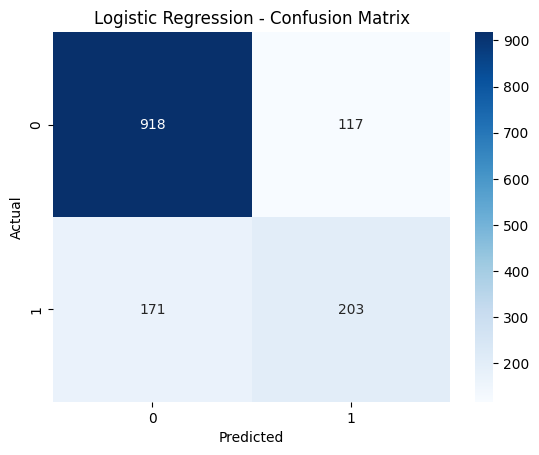

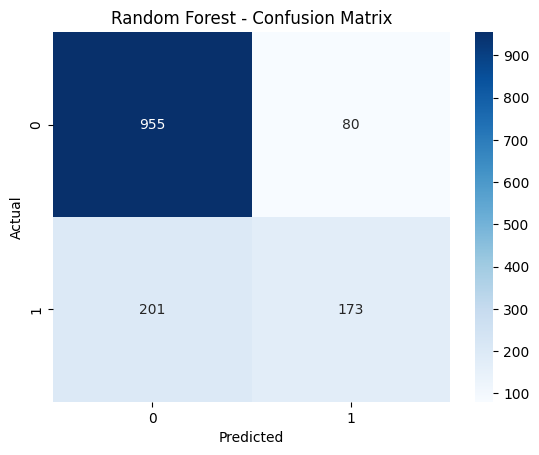

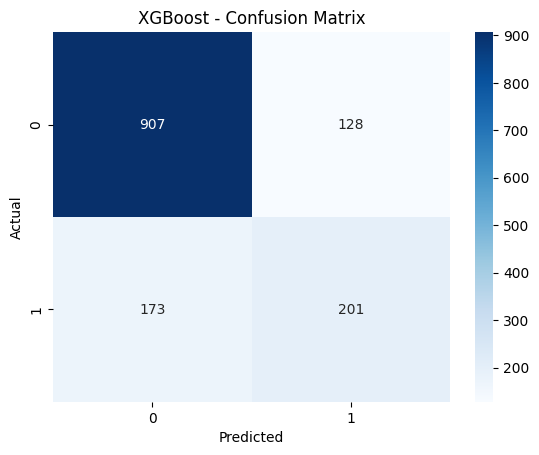

In [ ]:
# Matriz de Confusión

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Regresión Logística
cm_lr = confusion_matrix(y_test_encoded, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest
cm_rf = confusion_matrix(y_test_encoded, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# XGBoost
cm_xgb = confusion_matrix(y_test_encoded, xgb_pred)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


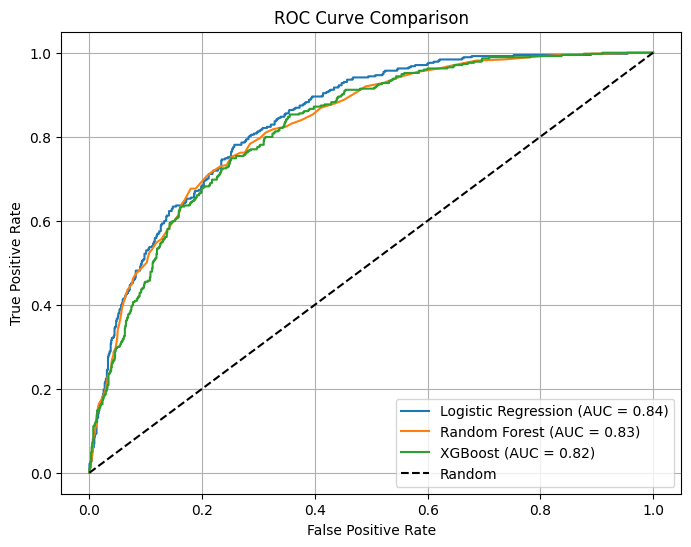

In [ ]:
# Curva ROC

from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

# Regresión Logística
probs_lr = lr_model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test_encoded, probs_lr)
auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")

# Random Forest
probs_rf = rf_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_encoded, probs_rf)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")

# XGBoost
probs_xgb = xgb_model.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_encoded, probs_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})")

# Línea aleatoria
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


## **8. Importancia de las Características**

Para entender mejor qué variables tienen mayor impacto en las predicciones del modelo, analizamos la importancia de las características utilizando dos enfoques: para los modelos basados en árboles y con valores SHAP.

### Importancia de las Características en Modelos Basados en Árboles


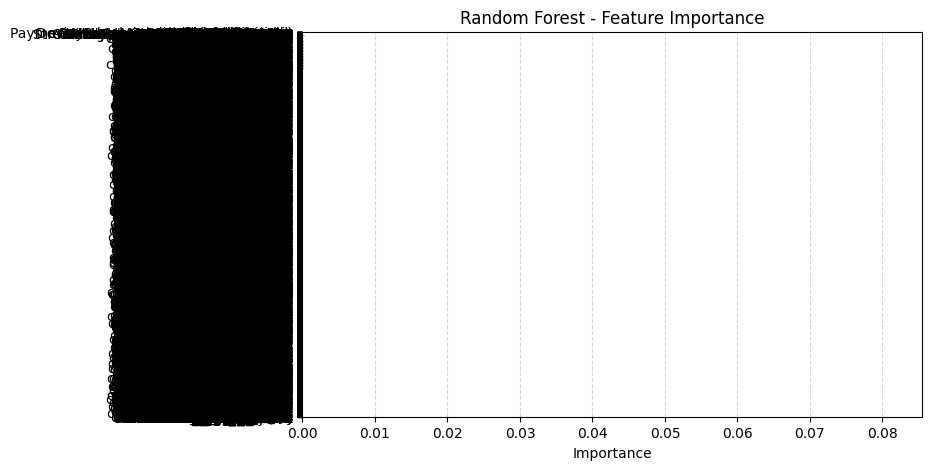

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener las importancias de las características del modelo Random Forest
rf_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=True)

# Grafico
plt.figure(figsize=(8, 5))
rf_importance.plot(kind='barh', color='skyblue')
plt.title('Random Forest - Feature Importance')
plt.xlabel('Importance')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


Este gráfico nos ayuda a identificar las características más influyentes en la predicción del churn de clientes, según el modelo de Random Forest.

### Valores SHAP

SHAP (SHapley Additive exPlanations) es una herramienta que explica el resultado de los modelos de aprendizaje automático de una manera más interpretable. Muestra cuánto contribuye cada característica a una predicción específica.


 98%|===================| 1380/1409 [00:12<00:00]       

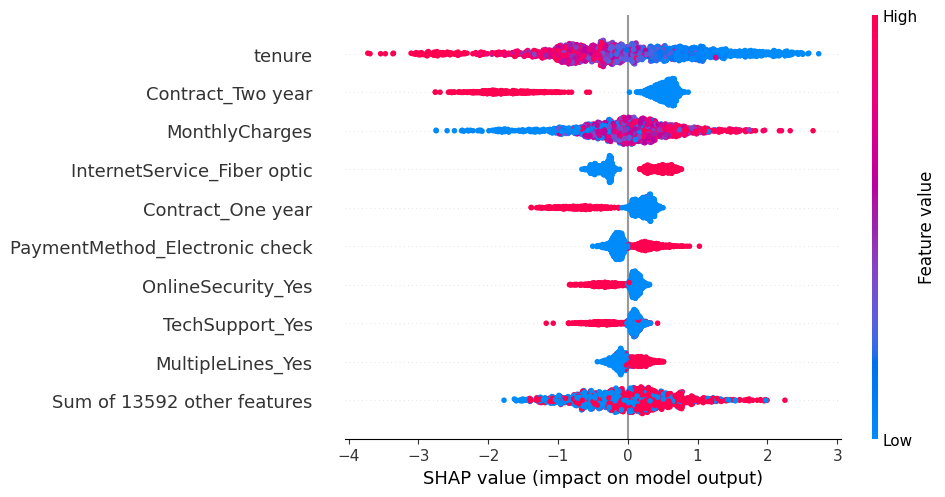

In [ ]:
import shap

# Inicializar el explicador de SHAP
explainer = shap.Explainer(xgb_model, X_test)
shap_values = explainer(X_test)

# Gráfico de resumen
shap.plots.beeswarm(shap_values)

## **9. Conclusiones**
* Los tres modelos (Regresión Logística, Random Forest y XGBoost) mostraron un buen rendimiento, siendo XGBoost el que ligeramente superó a los demás.
* Las matrices de confusión y las curvas ROC confirmaron que los modelos están equilibrados y no sesgados hacia una sola clase.
* Las variables más importantes para predecir el churn de clientes estaban relacionadas con el cargo mensual (cargo_fijo), la velocidad (velocidad) y el tiempo que el cliente llevaba suscrito (tiempo_vida_cliente).
* Este análisis puede ayudar a la empresa a tomar medidas tempranas para prevenir el churn, especialmente identificando a los clientes con un cargo fijo alto y una corta permanencia.

## **10. Recomendaciones**
* Enfocar los esfuerzos en los clientes con altos cargos mensuales y un tiempo de servicio corto, ya que son más propensos a abandonar.
* Considerar ofrecer programas de lealtad o descuentos para mejorar la retención.
* Actualizar continuamente el modelo con nuevos datos para mantener la precisión de las predicciones a lo largo del tiempo.
